## Simple CNN for Mnist dataset

In [85]:

from __future__ import print_function
import torch.nn as nn

import argparse
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt 
%xmode plain

Exception reporting mode: Plain


In [43]:
batch_size = 64

## MNist dataset

train_dataset = datasets.MNIST(root='./data/', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor())


# Data Loader (Input Pipeline)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



In [86]:
fig = plt.figure()
examples = enumerate(test_loader)
batch_idx, (example_data, example_target) = next(examples)

print(example_data.shape)

torch.Size([64, 1, 28, 28])


<Figure size 432x288 with 0 Axes>

## A look at the data

<Figure size 432x288 with 0 Axes>

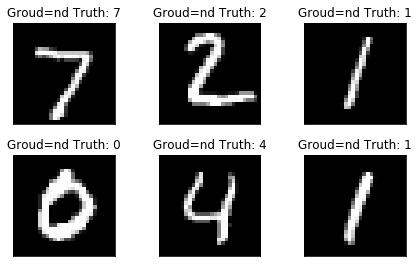

In [90]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Groud=nd Truth: {}".format(example_target[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [44]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)

        self.fc = nn.Linear(320,10)
    
    def forward(self, x):
        
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)
        x = self.fc(x)
        
        return F.log_softmax(x)
    

In [52]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [53]:
print(model)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)


In [54]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)


In [63]:
print(len(train_dataset[0]))

2


In [122]:
def train(epoch):
    model.train() # tells the model that you are training

    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = data, target
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        #print(loss.data)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data))
        
def test():
    model.eval() # tells the model that you are training
    test_loss = 0
    correct = 0
    
    for data, target in test_loader:
        ## Pytorcch variables depricated
        data, target = data, target
        output = model(data)
        # sum up batch loss        
        test_loss += F.nll_loss(output, target, size_average=False).data
        # get the index of max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

for epoch in range(1,10):
    train(epoch)
    test()
          

C:\Users\yakka\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.030699
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.004436
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.045343
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.010334
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.032033
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.005329
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.001703
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.011680
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.009198
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.016817
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.011694
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.005173
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.028331
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.007678
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.014712
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.033004
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.004983
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.011483
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.016285
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.012061
Train Epoch: 1 [12800/60000 (

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])


<Figure size 432x288 with 0 Axes>

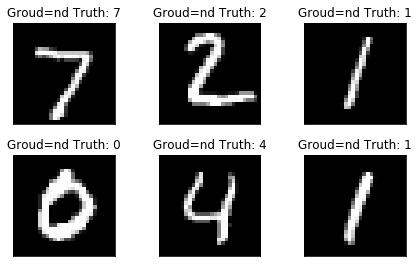

In [108]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.tight_layout()
    print(example_data.shape)
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Groud=nd Truth: {}".format(example_target[i]))
    plt.xticks([])
    plt.yticks([])
fig

torch.Size([28, 28])
torch.Size([28, 28])


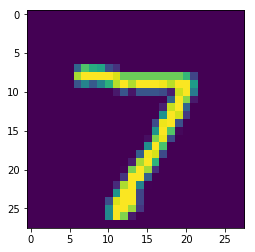

In [120]:
print(example_data[1][0].shape)
print(example_data[0][0].shape)
plt.imshow(example_data[0][0])

In [119]:
model.forward(example_data).max(1)

C:\Users\yakka\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(tensor([-5.5313e-05, -5.7220e-06, -1.0548e-03, -4.3869e-05, -1.0490e-05,
         -3.3188e-04, -2.2984e-04, -1.1385e-02, -8.5258e-04, -1.4734e-03,
          0.0000e+00, -1.9073e-06, -1.6403e-04, -2.2888e-05, -1.6308e-04,
         -8.2016e-05, -5.4541e-03, -9.1553e-05, -3.3302e-01, -1.9073e-06,
         -2.6209e-02, -4.2095e-03, -1.9073e-06, -1.9073e-06, -8.1062e-05,
         -1.9073e-05, -2.2888e-05,  0.0000e+00, -1.5831e-03, -7.1907e-04,
          0.0000e+00, -2.4557e-03,  0.0000e+00, -4.7684e-05, -1.5068e-04,
          0.0000e+00, -1.3691e-02, -5.1880e-04, -8.7738e-05, -7.4005e-04,
         -1.9418e-02, -1.5365e-01, -1.3351e-05, -8.6498e-04, -4.6349e-04,
         -4.6539e-04, -3.5667e-04,  0.0000e+00, -1.9073e-06, -5.7220e-06,
         -1.2398e-05, -2.6703e-05, -7.6294e-06, -3.8147e-06,  0.0000e+00,
         -4.3297e-04, -1.9073e-06, -2.9879e-03, -5.1498e-05, -6.8378e-04,
          0.0000e+00, -8.5163e-04, -6.2672e-01, -2.2335e-03],
        grad_fn=<MaxBackward0>),
 tensor([7, 2, 1,